In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [28]:
# Correct way without extra quotes
df = pd.read_csv(r'C:\Zomato Cuisine Clustering\Zomato_data.csv')


In [29]:
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


In [31]:
# Step 2 – Process 'rate' column
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0].strip() if isinstance(x, str) else x)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df = df.dropna(subset=['rate']).reset_index(drop=True)

In [32]:
# Step 3 – Convert 'online_order' and 'book_table' to binary (Yes → 1, else 0)
df['online_order'] = df['online_order'].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'yes' else 0)


In [33]:
# Step 4 – One-Hot Encode 'listed_in(type)'
encoder = OneHotEncoder(sparse_output=False)
cuisine_encoded = encoder.fit_transform(df[['listed_in(type)']])
cuisine_df = pd.DataFrame(cuisine_encoded, columns=encoder.get_feature_names_out())

In [34]:
# Step 5 – Combine features into final DataFrame
df_final = pd.concat([
    df[['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)']],
    cuisine_df
], axis=1)

In [35]:
# Step 6 – Normalize numerical features
scaler = StandardScaler()
df_final[['rate', 'votes', 'approx_cost(for two people)']] = scaler.fit_transform(
    df_final[['rate', 'votes', 'approx_cost(for two people)']]
)

In [36]:
# Preview the final prepared dataset
df_final.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other
0,1,1,1.164583,0.783142,1.717071,1.0,0.0,0.0,0.0
1,1,0,1.164583,0.801562,1.717071,1.0,0.0,0.0,0.0
2,1,0,0.416284,1.002647,1.717071,1.0,0.0,0.0,0.0
3,0,0,0.166850,-0.271405,-0.531836,1.0,0.0,0.0,0.0
4,0,0,0.416284,-0.151675,0.817508,1.0,0.0,0.0,0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

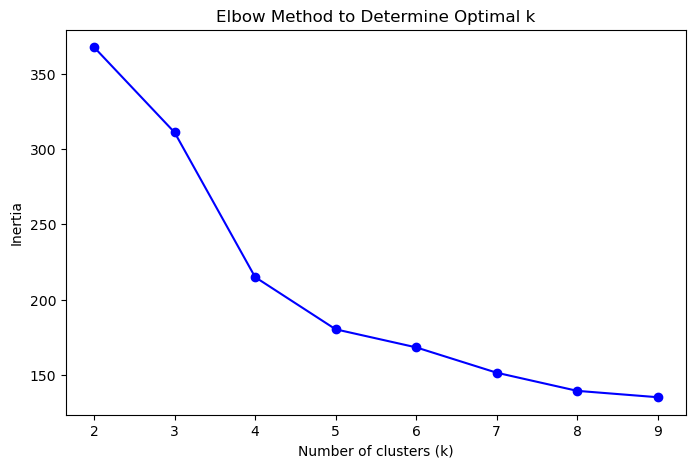

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [38]:
# Apply K-Means clustering with chosen k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_final['cluster'] = kmeans.fit_predict(df_final)

# Show some of the clustered data
df_final.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other,cluster
0,1,1,1.164583,0.783142,1.717071,1.0,0.0,0.0,0.0,2
1,1,0,1.164583,0.801562,1.717071,1.0,0.0,0.0,0.0,2
2,1,0,0.416284,1.002647,1.717071,1.0,0.0,0.0,0.0,2
3,0,0,0.166850,-0.271405,-0.531836,1.0,0.0,0.0,0.0,0
4,0,0,0.416284,-0.151675,0.817508,1.0,0.0,0.0,0.0,2


In [39]:
# Add cluster labels to the original DataFrame
df['cluster'] = df_final['cluster']

# Preview original data with cluster labels
df[['name', 'listed_in(type)', 'rate', 'votes', 'cluster']].head()


,name,listed_in(type),rate,votes,cluster
0,Jalsa,Buffet,4.1,775,2
1,Spice Elephant,Buffet,4.1,787,2
2,San Churro Cafe,Buffet,3.8,918,2
3,Addhuri Udupi Bhojana,Buffet,3.7,88,0
4,Grand Village,Buffet,3.8,166,2


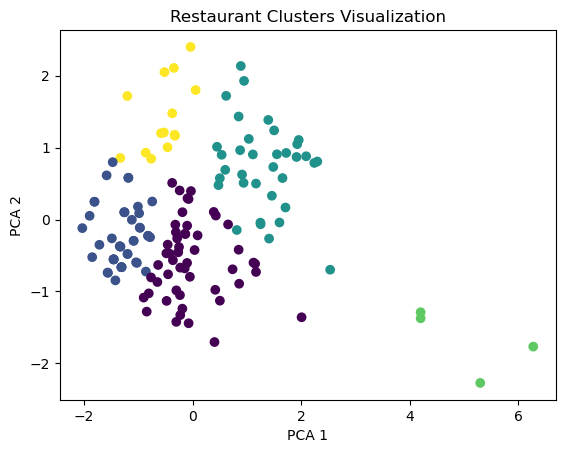

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_final.drop('cluster', axis=1))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_final['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Restaurant Clusters Visualization')
plt.show()


In [46]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_final.drop('cluster', axis=1), df_final['cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.3049878368555811


In [47]:
def recommend_similar(restaurant_name, n_recommendations=5):
    # Find the cluster of the given restaurant
    try:
        cluster_label = df[df['name'].str.lower() == restaurant_name.lower()]['cluster'].values[0]
        
        # Get other restaurants in the same cluster
        similar_restaurants = df[df['cluster'] == cluster_label]['name'].sample(n=n_recommendations).values
        
        return similar_restaurants
    except IndexError:
        return "Restaurant not found. Please check the name."


In [48]:
recommendations = recommend_similar('Domino\'s Pizza', n_recommendations=5)
print("Recommended Restaurants:")
for r in recommendations:
    print(r)


Recommended Restaurants:
Redberrys
Ovenstory Pizza
Kirthi's Biryani
Caf-Eleven
Wamama


In [49]:
def recommend_highly_rated(restaurant_name, n_recommendations=5):
    try:
        # Find the cluster label of the given restaurant
        cluster_label = df[df['name'].str.lower() == restaurant_name.lower()]['cluster'].values[0]
        
        # Filter restaurants in the same cluster, sorted by highest rating
        similar_restaurants = (
            df[df['cluster'] == cluster_label]
            .sort_values(by='rate', ascending=False)['name']
            .unique()
        )
        
        # Return top n recommendations
        recommendations = similar_restaurants[:n_recommendations]
        return recommendations
    except IndexError:
        return "Restaurant not found. Please check the name."


In [50]:
recommendations = recommend_highly_rated('Domino\'s Pizza', n_recommendations=5)
print("Recommended Highly Rated Restaurants:")
for r in recommendations:
    print(r)


Recommended Highly Rated Restaurants:
Smacznego
The Coffee Shack
Cafe Shuffle
Wamama
Peppy Peppers
